 ## Mail Spam Detection with Logistic Regression
 
Objective:

we used previously collected data in order to train the model and predicted the category for new incoming emails.

**Type of problem: Classification, Supervised**

### Classification algorithm :

1. Logistic Regression

Data cleaned by NLP


Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing

In [2]:
# loading the data from csv file to a pandas Dataframe
data = pd.read_csv(r"E:\Dataset\mail_data.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.shape

(5572, 2)

In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

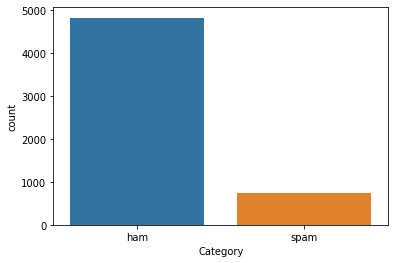

In [6]:
sns.countplot( x = "Category" , data = data)

In [7]:
## we don't have a missing value

In [8]:
def message_clean(message): 
    # changing to lower case
    lower = message.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [9]:
data['Message'] = message_clean(data['Message'])

In [10]:
# printing the first 5 rows of the dataframe
data.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [11]:
from nltk.corpus import stopwords
# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['Message'] = data['Message'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [12]:
data.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [13]:
# checking the number of rows and columns in the dataframe
data.shape

(5572, 2)

Label Encoding

In [14]:
# label spam mail as 0;  ham mail as 1;

data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [15]:
# separating the data as texts and label

X = data['Message']

Y = data['Category']

In [16]:
print(X)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [17]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [20]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [21]:
print(X_train)

3075                                    know msg recently
1787    know god created gap fingers one made comes am...
1614                               thnx dude u guys 2nite
4304                                             yup free
3266    44 7732584351 want new nokia 3510i colour phon...
                              ...                        
789     5 free top polyphonic tones call 087018728737 ...
968     u want come back beautiful necklace token hear...
1667      guess spent last night phasing fourth dimension
3321    eh sorry leh din c ur msg sad already lar watc...
1688    free top ringtone sub weekly ringtone get 1st ...
Name: Message, Length: 4457, dtype: object


In [22]:
print(X_train_features)

  (0, 5504)	0.7522426973337948
  (0, 4527)	0.5059234611879639
  (0, 3872)	0.4221046975900264
  (1, 4143)	0.17933511550752448
  (1, 3245)	0.2820497236673163
  (1, 3382)	0.3002496212860973
  (1, 3014)	0.3227834382443474
  (1, 2795)	0.3227834382443474
  (1, 929)	0.21724315439903938
  (1, 1869)	0.2645209513420531
  (1, 4219)	0.2560122556601863
  (1, 4831)	0.17962171163180743
  (1, 2808)	0.306456742811443
  (1, 3013)	0.3137982093620834
  (1, 2021)	0.3137982093620834
  (1, 3106)	0.23781235804140538
  (1, 3872)	0.16546146745857357
  (2, 407)	0.509272536051008
  (2, 3216)	0.4107239318312698
  (2, 2433)	0.45287711070606745
  (2, 6711)	0.6056811524587518
  (3, 2925)	0.5864269879324768
  (3, 7544)	0.8100020912469564
  (4, 50)	0.2348793028471978
  (4, 1568)	0.11091540733859852
  :	:
  (4455, 6344)	0.21927215445169945
  (4455, 6926)	0.2806945305761825
  (4455, 6196)	0.21812104117990885
  (4455, 7235)	0.2882928743523469
  (4455, 906)	0.2461989572590807
  (4455, 3933)	0.2935092032328407
  (4455, 4795

Training the Model

Logistic Regression

In [23]:
model = LogisticRegression()

In [24]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [25]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [26]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9690374691496523


In [27]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [28]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.967713004484305


Building a Predictive System

In [29]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
